In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

# import dataset
salaries = pd.read_csv('salaries_1985to2018.csv')
players = pd.read_csv('players.csv')

# Merge the two dataframes
df = pd.merge(salaries, players, left_on='player_id', right_on='_id', how='left')
df.drop('_id', axis=1, inplace=True)

filtered_df = df[['season', 'salary', 'position', 'name']]

# Extract the start year of the season and convert it to datetime
filtered_df['season'] = pd.to_datetime(filtered_df['season'].str.split('-', expand=True)[0], format='%Y')

# Mapping dictionary to shorten positions
position_mapping = {
    'Point Guard': 'PG',
    'Shooting Guard': 'SG',
    'Center and Small Forward and Power Forward': 'C',
    'Power Forward and Small Forward': 'PF',
    'Center': 'C',
    'Power Forward': 'PF',
    'Shooting Guard and Small Forward': 'SG/SF',
    'Power Forward and Center': 'PF/C',
    'Shooting Guard and Point Guard': 'SG/PG',
    'Point Guard and Shooting Guard': 'PG/SG',
    'Small Forward': 'SF',  
    'Shooting Guard and Small Forward and Point Guard': 'SG/SF/PG',
    'Small Forward and Shooting Guard': 'SF/SG',
    'Point Guard and Power Forward and Small Forward and Shooting Guard': 'PG/PF/SF/SG',
    'Small Forward and Power Forward': 'SF/PF',
    'Center and Power Forward': 'C/PF',
    'Small Forward and Power Forward and Shooting Guard': 'SF/PF/SG',
    'Shooting Guard and Small Forward and Power Forward': 'SG/SF/PF',
    'Shooting Guard and Point Guard and Small Forward': 'SG/PG/SF',
    'Power Forward and Shooting Guard': 'PF/SG',
    'Small Forward and Shooting Guard and Power Forward': 'SF/SG/PF',
    'Power Forward and Small Forward and Shooting Guard': 'PF/SF/SG',
    'Small Forward and Shooting Guard and Point Guard': 'SF/SG/PG',
    'Small Forward and Center and Power Forward': 'SF/C/PF',
    'Small Forward and Power Forward and Center': 'SF/PF/C',
    'Small Forward and Point Guard and Shooting Guard': 'SF/PG/SG',
    'Power Forward and Center and Small Forward': 'PF/C/SF',
    'Small Forward and Center': 'SF/C',
    'Center and Power Forward and Small Forward': 'C/PF/SF',
    'Power Forward and Shooting Guard and Small Forward': 'PF/SG/SF',
    'Shooting Guard and Power Forward and Small Forward': 'SG/PF/SF',
    'Point Guard and Shooting Guard and Small Forward': 'PG/SG/SF',
    'Power Forward and Small Forward and Center': 'PF/SF/C',
    'Point Guard and Small Forward and Shooting Guard': 'PG/SF/SG',
    'Point Guard and Small Forward': 'PG/SF'
}

# Map the positions using the mapping dictionary
filtered_df['position'] = filtered_df['position'].map(position_mapping)

original_positions = ['PG', 'SG', 'SF', 'PF', 'C']
filtered_df = filtered_df[filtered_df['position'].isin(original_positions)]

/var/folders/zh/wdgtpnt12x3fw44lgg__jbh40000gn/T/ipykernel_41231/3093930283.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['season'] = pd.to_datetime(filtered_df['season'].str.split('-', expand=True)[0], format='%Y')
/var/folders/zh/wdgtpnt12x3fw44lgg__jbh40000gn/T/ipykernel_41231/3093930283.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['position'] = filtered_df['position'].map(position_mapping)


In [2]:
filtered_df.dtypes

season      datetime64[ns]
salary               int64
position            object
name                object
dtype: object

In [3]:
# Make a copy of the original DataFrame
filtered_df_copy = filtered_df.copy()

# One-hot encode the 'position' column
filtered_df_copy = pd.get_dummies(filtered_df_copy, columns=['position'])

# Filter data for guard positions (PG, SG)
guard_df = filtered_df_copy[(filtered_df_copy['position_SG'] == 1) | (filtered_df_copy['position_PG'] == 1)]

relevant_features = filtered_df_copy.drop(['salary', 'name'], axis=1)

# Prepare data: Extract relevant features
X = relevant_features 
X.loc[:, 'season'] = pd.to_datetime(X['season']).dt.year  # Extract year from season using .loc
y = filtered_df_copy['salary']  # Target variable: salary

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
coefficient = model.coef_[0]  # Coefficient for season year

# Check if coefficient is positive
if coefficient > 0:
    print(f"There is a positive correlation of {coefficient} between season year and salary for guard positions.")
else:
    print("There is no positive correlation between season year and salary for guard positions.")


There is a positive correlation of 140533.9565555491 between season year and salary for guard positions.


## The coefficient value of approximately $140533.9565555491 indicates that, on average, for every one unit increase in the season year (e.g., moving from 1990 to 1991), the salary for guard positions increases by approximately $140533.9565555491.

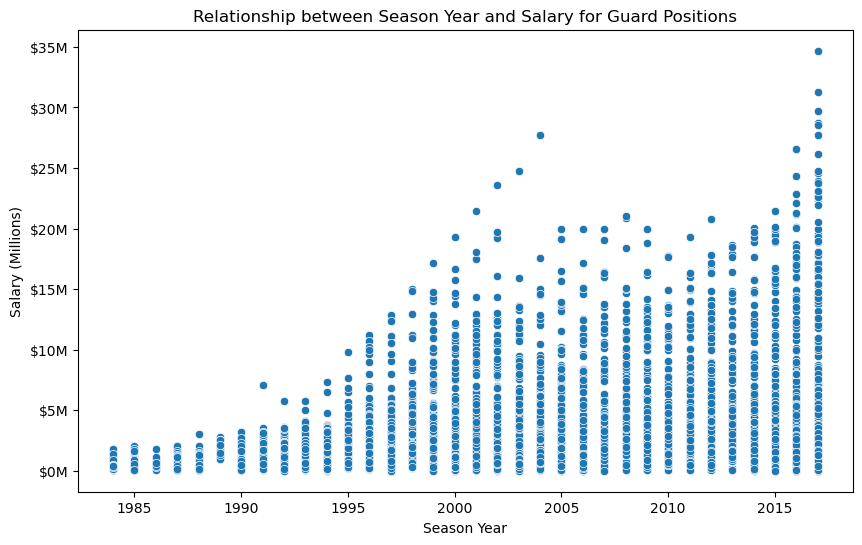

In [4]:
# Convert salary to millions
y_millions = y / 1_000_000

# Visualization
plt.figure(figsize=(10, 6))


sns.scatterplot(x=X['season'], y=y_millions)
plt.title('Relationship between Season Year and Salary for Guard Positions')
plt.xlabel('Season Year')
plt.ylabel('Salary (Millions)')

# Format y-axis labels to display in millions
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}M'))

plt.show()
